## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

## Getting the dataset

In [2]:
df=pd.read_csv('NASA.csv')

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.shape

(90836, 10)

## Understanding three different features

In [5]:
df['absolute_magnitude'].describe()

count    90836.000000
mean        23.527103
std          2.894086
min          9.230000
25%         21.340000
50%         23.700000
75%         25.700000
max         33.200000
Name: absolute_magnitude, dtype: float64

In [6]:
df['relative_velocity'].describe()

count     90836.000000
mean      48066.918918
std       25293.296961
min         203.346433
25%       28619.020645
50%       44190.117890
75%       62923.604633
max      236990.128088
Name: relative_velocity, dtype: float64

In [7]:
df['miss_distance'].describe()

count    9.083600e+04
mean     3.706655e+07
std      2.235204e+07
min      6.745533e+03
25%      1.721082e+07
50%      3.784658e+07
75%      5.654900e+07
max      7.479865e+07
Name: miss_distance, dtype: float64

## Data Processing 

In [8]:
# transforming True and False to 1's and 0's for testing our model

df['hazardous']=df['hazardous'].replace({True:1,False:0})
df['sentry_object']=df['sentry_object'].replace({True:1,False:0})

In [9]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,0,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,0,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,0,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,0,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,0,20.09,1


## Box Plot

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

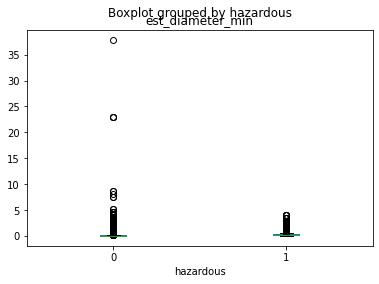

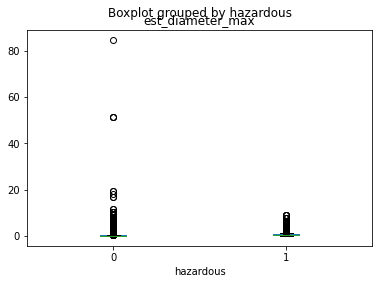

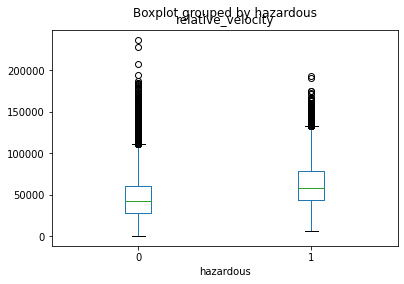

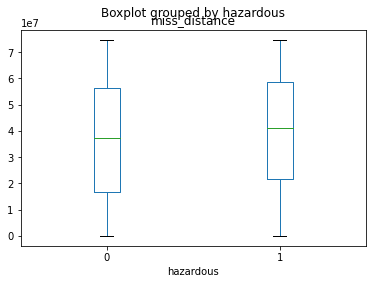

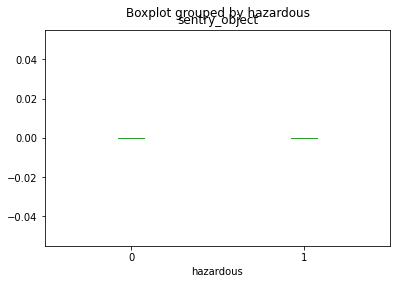

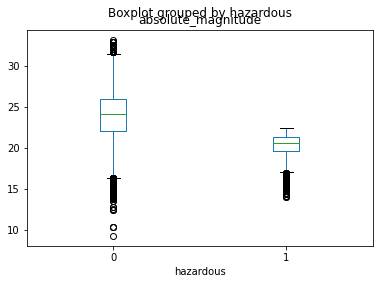

In [11]:
box_feature = ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "sentry_object", "absolute_magnitude"]
for i in box_feature:
    df.boxplot(by ='hazardous', column =i, grid = False)

## Min-Max Scaling

In [12]:
df_new = df.drop(['id','name','orbiting_body'], axis=1)

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df_new.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "sentry_object", "absolute_magnitude", "hazardous"])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,0.031607,0.031607,0.056447,0.733141,0.0,0.312891,0.0
1,0.006999,0.006999,0.309922,0.821364,0.0,0.449312,1.0
2,0.019039,0.019039,0.481680,0.665740,0.0,0.358782,0.0
3,0.002531,0.002531,0.103726,0.339986,0.0,0.541093,0.0
4,0.006714,0.006714,0.179632,0.618634,0.0,0.453066,1.0


## Outlier Removal

In [13]:
    
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

    
for feature in ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]:
    lowerbound, upperbound = outlier_treatment(df_scaled[feature])
    print("For Column: ", feature, " ->  Range:", lowerbound, " To ", upperbound)
    print("Total outliers removed: ", len(df_scaled[(df_scaled[feature] < lowerbound) | (df_scaled[feature] > upperbound)]))
    print()
    values = df_scaled[(df_scaled[feature] < lowerbound) | (df_scaled[feature] > upperbound)]
    df_scaled.drop(values.index, inplace=True)
    

For Column:  est_diameter_min  ->  Range: -0.00442238064400785  To  0.008682895574260894
Total outliers removed:  8306

For Column:  est_diameter_max  ->  Range: -0.003046316826577547  To  0.006270220569157485
Total outliers removed:  4622

For Column:  relative_velocity  ->  Range: -0.08656908256136542  To  0.4497860595502483
Total outliers removed:  1140

For Column:  miss_distance  ->  Range: -0.6056565780906131  To  1.531423981180784
Total outliers removed:  0

For Column:  absolute_magnitude  ->  Range: 0.3241551939924907  To  0.9249061326658321
Total outliers removed:  101



## Pair Plots

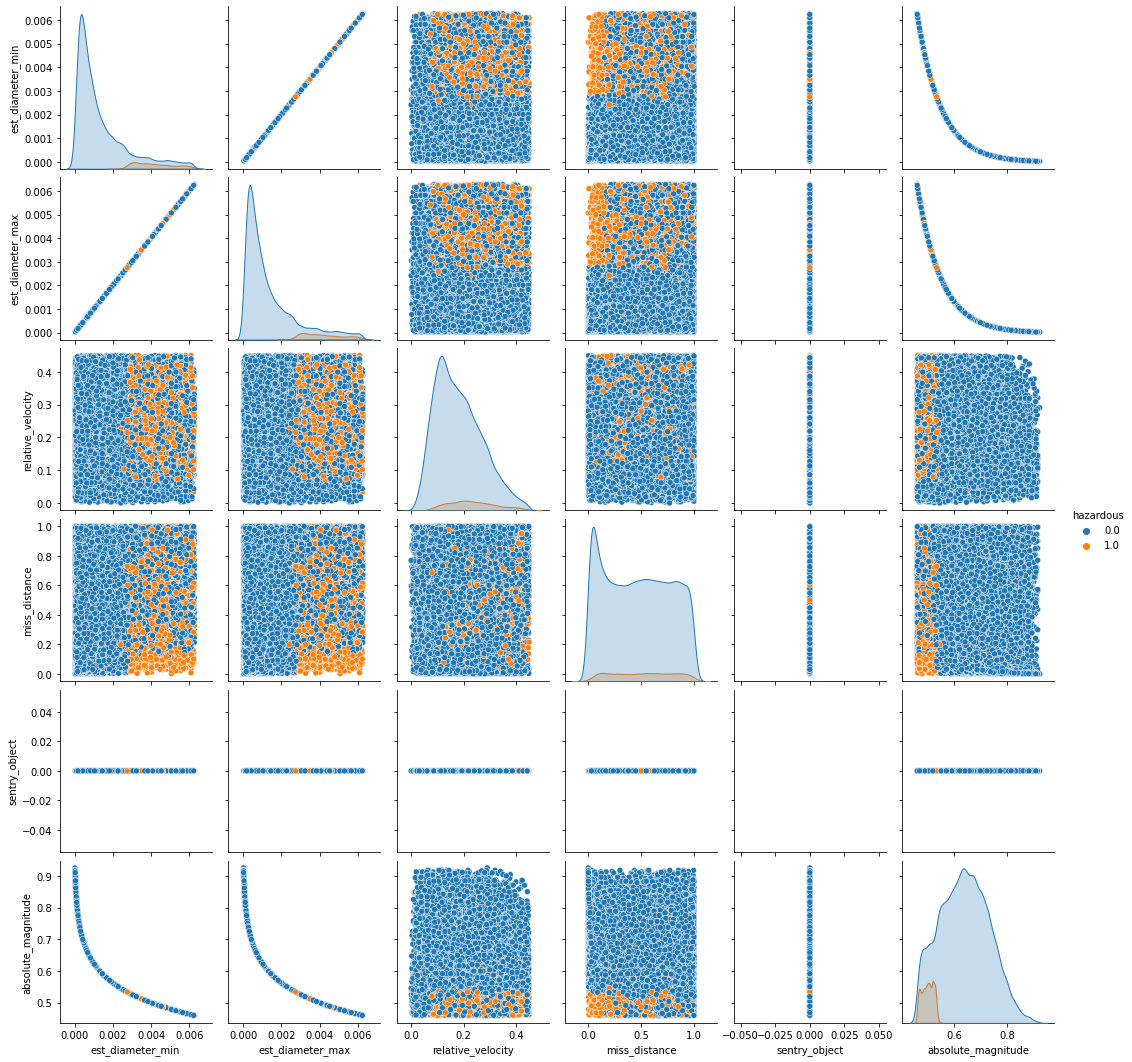

In [14]:
sns.pairplot(df_scaled, hue="hazardous", vars=["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "sentry_object", "absolute_magnitude"])

## SVM

In [15]:
train_data, test_data, y_train, y_test = train_test_split(df_scaled.drop(columns="hazardous"), df_scaled.hazardous, test_size=0.2, random_state=4)

In [16]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC(kernel='rbf', C=10, gamma=1, class_weight="balanced")
model.fit(train_data, y_train)
y_pred = model.predict(test_data)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print ("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8164862397287075
Precision: 0.2627718103222426
Recall: 1.0
F1_Score: 0.41618257261410796


## PCA

In [18]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_scaled)


pca = PCA(n_components = 2)
pca.fit(train_data)
data_pca_train = pca.transform(train_data)
data_pca_test = pca.transform(test_data)
data_pca = pd.DataFrame(data_pca_train,columns=['PC1','PC2'])


In [19]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC(kernel='rbf', C=10, gamma=1)
model.fit(data_pca_train, y_train)
y_pred_1 = model.predict(data_pca_test)

In [20]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.934589800443459


## Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 2, 10], 
              'gamma': [1, 0.01],
              'kernel': ['rbf', 'poly']} 
  
grid = GridSearchCV(svm.SVC(class_weight="balanced"), param_grid, refit = True, verbose = 3, n_jobs=-1, cv=2)

grid.fit(train_data, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 2, 10], 'gamma': [1, 0.01],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [22]:
grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=1, kernel='poly')

## Random Forest 

In [23]:
model = RandomForestClassifier()
model.fit(train_data,y_train)
y_pred = model.predict(test_data)

accuracy = model.score(train_data, y_train)

print(accuracy)

0.9999836955635628


## KNN

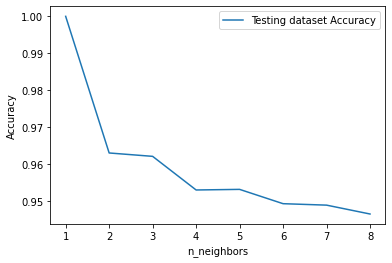

In [24]:
from sklearn.neighbors import KNeighborsClassifier

  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(train_data, y_train)
  
# Generate plot
plt.plot(neighbors, train_accuracy, label = 'Testing dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()